<a href="https://colab.research.google.com/github/swapniel99/erav1s9/blob/main/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/swapniel99/erav1s9.git
%cd erav1s9/
!git pull
%ls

fatal: destination path 'erav1s9' already exists and is not an empty directory.
/content/erav1s9
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 328 bytes | 328.00 KiB/s, done.
From https://github.com/swapniel99/erav1s9
   fd4d7db..cce1556  main       -> origin/main
Updating fd4d7db..cce1556
Fast-forward
 model.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
backprop.py  model.py      README.md         utils.py
datasets/    __pycache__/  requirements.txt


In [3]:
from utils import *
set_seed(42)

Device Selected: cuda


In [4]:
from datasets import CIFAR10
from torchvision import transforms
batch_size = 32
cifar10 = CIFAR10(batch_size, False)

Files already downloaded and verified
Files already downloaded and verified


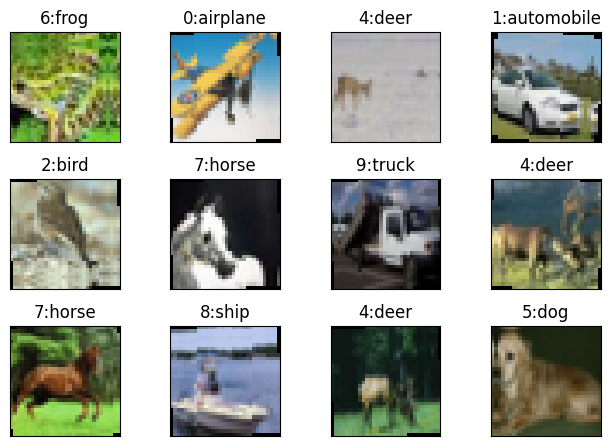

In [5]:
cifar10.show_examples()

In [6]:
from backprop import Experiment

In [7]:
from model import Model

In [8]:
model1 = Model(skip=True, dropout=0.01)
model1.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model                                    [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 24, 32, 32]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 24, 32, 32]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 24, 32, 32]          648                         0.32%
│    │    └─BatchNorm2d: 3-2             [32, 24, 32, 32]          [32, 24, 32, 32]          48                          0.02%
│    │    └─ReLU: 3-3                    [32, 24, 32, 32]          [32, 24, 32, 32]          --                             --
│    │    └─Dropout: 3-4                 [32, 24, 32, 32]          [32, 24, 32, 32]          --                

In [13]:
from torch import nn

class Model2(nn.Module):
    def __init__(self):
        DROP = 0.01
        super(Model2, self).__init__()
        self.cblock1 = nn.Sequential(
            nn.Conv2d(3, 24, 3, groups=1, padding=1, bias=False),
            nn.BatchNorm2d(24),
            nn.Dropout(DROP),
            nn.ReLU(),
            nn.Conv2d(24, 24, 3, groups=24, padding=1, bias=False),
            nn.Conv2d(24, 24, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(24),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.tblock1 = nn.Sequential(
            nn.Conv2d(24, 32, 3, groups=1, dilation=1, bias=False),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.cblock2 = nn.Sequential(
            nn.Conv2d(32, 32, 3, groups=32, padding=1, bias=False),
            nn.Conv2d(32, 32, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, groups=32, padding=1, bias=False),
            nn.Conv2d(32, 32, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.tblock2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, groups=1, dilation=2, bias=False),
            nn.BatchNorm2d(64),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.cblock3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, groups=64, padding=1, bias=False),
            nn.Conv2d(64, 64, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(64),
            nn.Dropout(DROP),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, groups=64, padding=1, bias=False),
            nn.Conv2d(64, 64, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(64),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.tblock3 = nn.Sequential(
            nn.Conv2d(64, 96, 3, groups=1, dilation=4, bias=False),
            nn.BatchNorm2d(96),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.cblock4 = nn.Sequential(
            nn.Conv2d(96, 96, 3, groups=96, padding=1, bias=False),
            nn.Conv2d(96, 96, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(96),
            nn.Dropout(DROP),
            nn.ReLU(),
            nn.Conv2d(96, 96, 3, groups=96, padding=1, bias=False),
            nn.Conv2d(96, 96, 1, groups=1, padding=0, bias=False),
            nn.BatchNorm2d(96),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.tblock4 = nn.Sequential(
            nn.Conv2d(96, 96, 3, groups=1, dilation=8, bias=False),
            nn.BatchNorm2d(96),
            nn.Dropout(DROP),
            nn.ReLU()
        )

        self.oblock = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(96, 10, 1),
            nn.Flatten(),
            nn.LogSoftmax(-1),
        )

    def forward(self, x):
        x = self.cblock1(x)
        x = self.tblock1(x)
        x = x + self.cblock2(x)
        x = self.tblock2(x)
        x = x + self.cblock3(x)
        x = self.tblock3(x)
        x = x + self.cblock4(x)
        x = self.tblock4(x)
        x = self.oblock(x)
        return x

In [14]:
import torchinfo
model2 = Model2()
torchinfo.summary(model2, input_size=(batch_size, 3, 32, 32), col_names=["input_size", "output_size", "num_params", "params_percent"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model2                                   [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 24, 32, 32]          --                             --
│    └─Conv2d: 2-1                       [32, 3, 32, 32]           [32, 24, 32, 32]          216                         0.11%
│    └─Conv2d: 2-2                       [32, 24, 32, 32]          [32, 24, 32, 32]          576                         0.29%
│    └─BatchNorm2d: 2-3                  [32, 24, 32, 32]          [32, 24, 32, 32]          48                          0.02%
│    └─Dropout: 2-4                      [32, 24, 32, 32]          [32, 24, 32, 32]          --                             --
│    └─ReLU: 2-5                         [32, 24, 32, 32]          [32, 24, 32, 32]          --                

In [ ]:
exp1 = Experiment(model1, cifar10, lr=0.03)
exp1.execute(50)

Epoch 1


Train: Batch_id=1562, Average Loss=1.5730, Accuracy=42.58: 100%|██████████| 1563/1563 [00:56<00:00, 27.74it/s]


Test: Average loss: 1.1371, Accuracy: 59.17
Epoch 2


Train: Batch_id=1562, Average Loss=1.1925, Accuracy=57.43: 100%|██████████| 1563/1563 [00:56<00:00, 27.51it/s]


Test: Average loss: 0.9621, Accuracy: 65.79
Epoch 3


Train: Batch_id=1562, Average Loss=1.0376, Accuracy=63.22: 100%|██████████| 1563/1563 [00:58<00:00, 26.53it/s]


Test: Average loss: 0.8467, Accuracy: 70.50
Epoch 4


Train: Batch_id=1562, Average Loss=0.9300, Accuracy=67.12: 100%|██████████| 1563/1563 [00:57<00:00, 27.01it/s]


Test: Average loss: 0.8411, Accuracy: 71.42
Epoch 5


Train: Batch_id=1562, Average Loss=0.8672, Accuracy=69.56: 100%|██████████| 1563/1563 [00:58<00:00, 26.68it/s]


Test: Average loss: 0.6976, Accuracy: 75.56
Epoch 6


Train: Batch_id=1562, Average Loss=0.8185, Accuracy=71.43: 100%|██████████| 1563/1563 [00:58<00:00, 26.58it/s]


Test: Average loss: 0.6922, Accuracy: 75.92
Epoch 7


Train: Batch_id=1562, Average Loss=0.7772, Accuracy=72.79: 100%|██████████| 1563/1563 [00:57<00:00, 27.14it/s]


Test: Average loss: 0.6186, Accuracy: 78.44
Epoch 8


Train: Batch_id=1562, Average Loss=0.7342, Accuracy=74.34: 100%|██████████| 1563/1563 [00:57<00:00, 27.02it/s]


Test: Average loss: 0.5861, Accuracy: 79.45
Epoch 9


Train: Batch_id=1562, Average Loss=0.7100, Accuracy=75.08: 100%|██████████| 1563/1563 [00:57<00:00, 27.16it/s]


Test: Average loss: 0.5730, Accuracy: 79.77
Epoch 10


Train: Batch_id=1562, Average Loss=0.6877, Accuracy=75.85: 100%|██████████| 1563/1563 [00:57<00:00, 27.27it/s]


Test: Average loss: 0.5441, Accuracy: 81.05
Epoch 11


Train: Batch_id=1562, Average Loss=0.6665, Accuracy=76.83: 100%|██████████| 1563/1563 [00:57<00:00, 27.33it/s]


Test: Average loss: 0.5280, Accuracy: 81.39
Epoch 12


Train: Batch_id=1562, Average Loss=0.6547, Accuracy=77.30: 100%|██████████| 1563/1563 [00:56<00:00, 27.56it/s]


Test: Average loss: 0.5450, Accuracy: 80.91
Epoch 00012: reducing learning rate of group 0 to 9.0000e-03.
Epoch 13


Train: Batch_id=1562, Average Loss=0.5797, Accuracy=79.62: 100%|██████████| 1563/1563 [00:56<00:00, 27.47it/s]


Test: Average loss: 0.4614, Accuracy: 83.97
Epoch 14


Train: Batch_id=1562, Average Loss=0.5605, Accuracy=80.61: 100%|██████████| 1563/1563 [01:00<00:00, 25.96it/s]


Test: Average loss: 0.4554, Accuracy: 83.34
Epoch 15


Train: Batch_id=1562, Average Loss=0.5525, Accuracy=80.64: 100%|██████████| 1563/1563 [00:56<00:00, 27.55it/s]


Test: Average loss: 0.4504, Accuracy: 84.54
Epoch 16


Train: Batch_id=1562, Average Loss=0.5412, Accuracy=81.00: 100%|██████████| 1563/1563 [00:56<00:00, 27.74it/s]


Test: Average loss: 0.4375, Accuracy: 84.98
Epoch 17


Train: Batch_id=1562, Average Loss=0.5336, Accuracy=81.43: 100%|██████████| 1563/1563 [00:56<00:00, 27.76it/s]


Test: Average loss: 0.4281, Accuracy: 85.29
Epoch 18


Train: Batch_id=1562, Average Loss=0.5252, Accuracy=81.54: 100%|██████████| 1563/1563 [00:55<00:00, 28.00it/s]


Test: Average loss: 0.4318, Accuracy: 84.94
Epoch 00018: reducing learning rate of group 0 to 2.7000e-03.
Epoch 19


Train: Batch_id=1562, Average Loss=0.5033, Accuracy=82.43: 100%|██████████| 1563/1563 [00:56<00:00, 27.47it/s]


Test: Average loss: 0.4119, Accuracy: 85.76
Epoch 20


Train: Batch_id=1562, Average Loss=0.4963, Accuracy=82.78: 100%|██████████| 1563/1563 [00:55<00:00, 28.13it/s]


Test: Average loss: 0.4077, Accuracy: 86.07
Epoch 21


Train: Batch_id=1463, Average Loss=0.4943, Accuracy=82.81:  94%|█████████▎| 1464/1563 [00:51<00:03, 31.94it/s]

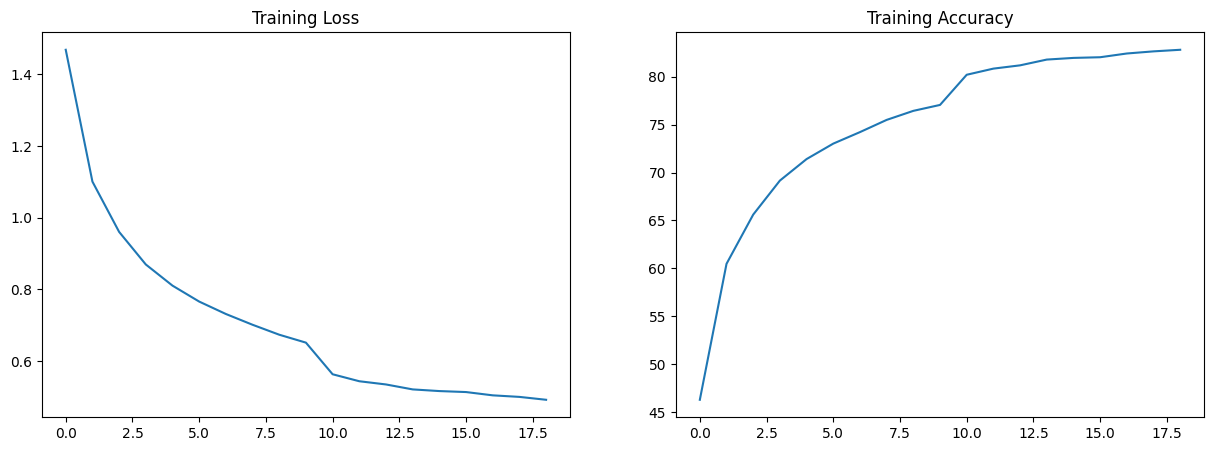

In [ ]:
exp1.train.plot_stats()

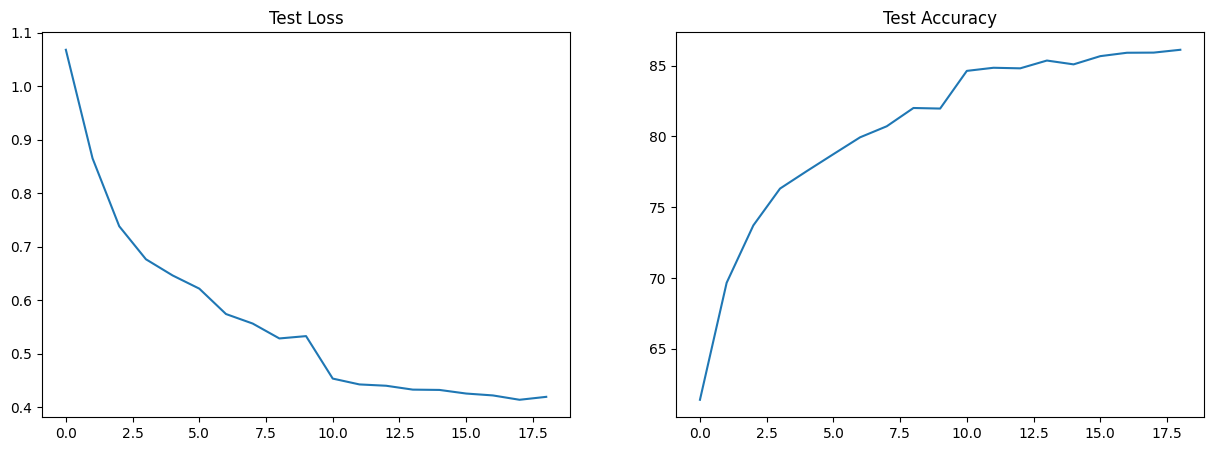

In [ ]:
exp1.test.plot_stats()

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f765d35b0><function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f765d35b0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
        self._shutdown_workers()
self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():    
if w.is_alive():  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

Test: Average loss: 0.4107, Accuracy: 86.33


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


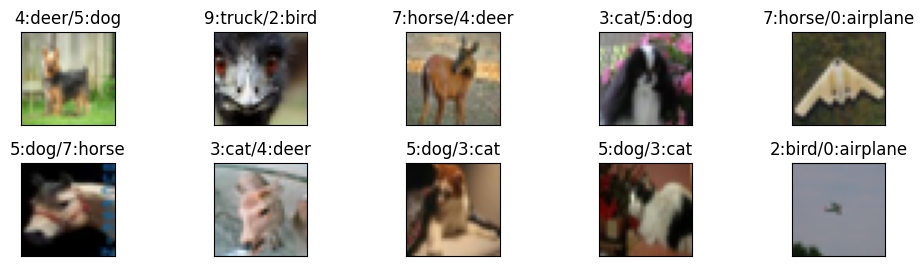

In [ ]:
exp1.show_incorrect()